In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

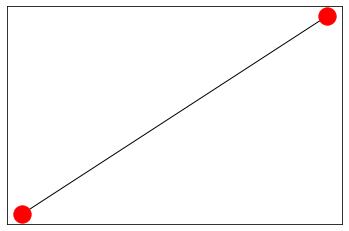

[0, 1, 3]
1  edges added
[0, 1, 3, 4]
1  edges added
[0, 1, 3, 4, 5]
1  edges added
[0, 1, 3, 4, 5, 6]
1  edges added
[0, 1, 3, 4, 5, 6, 7]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1  edges added
[0, 1, 3, 4, 5, 6, 7, 8, 

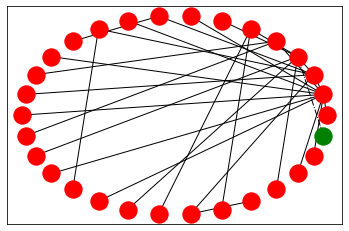

[1, 2, 3, 6, 7, 11]
[22, 3, 2, 1, 1, 1]


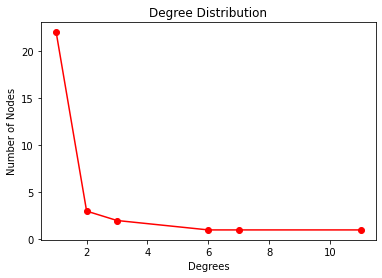

In [10]:
def display(g, i, ne):
    pos = nx.circular_layout(g)
      
    if i == '' and ne == '':
        new_node = []
        rest_nodes = g.nodes()
        new_edges = []
        rest_edges = g.edges()
    else:
        new_node = [i]
        rest_nodes = list(set(g.nodes()) - set(new_node))
        new_edges = ne
        rest_edges = list(set(g.edges()) - set(new_edges) - set([(b, a) for (a, b) in new_edges]))
    nx.draw_networkx_nodes(g, pos, nodelist=new_node, node_color='g')
    nx.draw_networkx_nodes(g, pos, nodelist=rest_nodes, node_color='r')
    nx.draw_networkx_edges(g, pos, edgelist=new_edges, style='dashdot')
    nx.draw_networkx_edges(g, pos, edgelist=rest_edges,)
    plt.show()
  
  
def barabasi_add_nodes(g, n, m0):
    m = m0 - 1
  
    for i in range(m0 + 1, n + 1):
        g.add_node(i)
        degrees = nx.degree(g)
        node_prob = {}
  
        s = 0
        for j in degrees:
            s += j[1]
        print(g.nodes())
          
        for each in g.nodes():
            node_prob[each] = (float)(degrees[each]) / s
  
        node_probabilities_cum = []
        prev = 0
          
        for n, p in node_prob.items():
            temp = [n, prev + p]
            node_probabilities_cum.append(temp)
            prev += p
  
        new_edges = []
        num_edges_added = 0
        target_nodes = []
  
        while (num_edges_added < m):
            prev_cum = 0
            r = random.random()
            k = 0
              
            while (not (r > prev_cum and r <= node_probabilities_cum[k][1])):
                prev_cum = node_probabilities_cum[k][1]
                k = k + 1
            target_node = node_probabilities_cum[k][0]
              
            if target_node in target_nodes:
                continue
              
            else:
                target_nodes.append(target_node)
            g.add_edge(i, target_node)
            num_edges_added += 1
            new_edges.append((i, target_node))
  
        print(num_edges_added, ' edges added')
  
    display(g, i, new_edges)
    return g
  
  
def plot_deg_dist(g):
    all_degrees = []
      
    for i in nx.degree(g):
        all_degrees.append(i[1])
    unique_degrees = list(set(all_degrees))
    unique_degrees.sort()
    count_of_degrees = []
  
    for i in unique_degrees:
        c = all_degrees.count(i)
        count_of_degrees.append(c)
  
    print(unique_degrees)
    print(count_of_degrees)
  
    plt.plot(unique_degrees, count_of_degrees, 'ro-')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()
  
  
N = 30
m0 = random.randint(2, N / 10)
g = nx.path_graph(m0)
display(g, '', '')
  
g = barabasi_add_nodes(g, N, m0)
plot_deg_dist(g)